1. Demuéstrese o refútese razonadamente la equivalencia entre los pares de enunciados siguientes:

a)
 * $¬(∃x : ¬(¬p(x) ∨ ¬q(x)))$ 
 * $[∀x, ¬p(x)] ∨ [∀x, ¬q(x)]$  

b)
 * $¬(∀x, ∃y : [(p(x, y) ∧ q(x, y)) → r(x, y)])$
 * $∃x :[(∀y, p(x, y)) ∧ (∀y, q(x, y)) ∧ (∀y, ¬r(x, y))]$

### Respuesta

**a)** El primer par es **no equivalente**. Al tener una doble negación sobre p(x) y q(x), esta se cancela, quedando sin afectar estos terminos. El unico término afectado sería la operación lógica $∨$ que quedaría como $∧$. Al aplicar la negación que afecta a todo el enunciado, este quedaría como $∀x, ¬p(x) ∨ ¬q(x)$ y por el principio de implicación, se puede reescribir como $[∀x, ¬p(x)] ∨ [∀x, ¬p(x)]$ sin embargo, aqui es donde se elimina la equivalencia ya que no es lo mismo **"Para todo x, se cumple $¬p(x)$ o $¬q(x)$" a "Para todo x se cumple $¬q(x)$, o bien, para todo x se cumple $¬q(x)$"**. 

**b)** El segundo par es **equivalente**. Al observarlo, podemos ver que existe una negación la cual afecta a todo el enunciado. Recordando que $p → q$ es equivalente a $¬p V q$ y sustituyendo, el enunciado quedaría $¬(∀x, ∃y : [(¬p(x, y) V ¬q(x, y)) V r(x, y)])$. Ahora, al aplicar la negación sobre todo el enunciado, quedaría de la siguiente manera: $∃x : ∀y, [p(x, y) ∧ q(x,y) ∧ (¬r(x, y))]$.        

2. Sea $A ∈ R^{3×3}$ la matriz cuadrada dada por:

$$ A =\begin{pmatrix} 3 & −3 & 2 \\ −4 & 4 & −4 \\ −3 & 3 & −2 \end{pmatrix}$$

a) Obtengase cuatro matrices $B ∈ R^{3×3}$ tales que $B^2 = A$.
Sugerencia: diagonalizar A puede ser de utilidad. Para el proceso de diagonalización, puedes hacer uso de numpy.linalg.eig en Python.

b) ¿Crees que las matrices se podrían haber obtenido por tanteo, empleando la fuerza bruta, con un coste computacional similar? ¿Qué nos dice esto, en términos de optimización, acerca de utilizar en determinadas ocasiones estrategias matemáticas en la resolución computacional de problemas?

### Respuesta

**a)** Para resolver este problema haremos uso de la diagonalización de matrices. Sea $A ∈ R^{n×n}$, diremos que A es diagonalizable si $∃P ∈ R^{n×n}$ y a su vez, P es inversible tal que $P^{-1}AP = D$. Uno de los casos de uso de diagonalizar una matriz, es el de calcular potencias de matrices, ya que resulta mas eficiente que realizar iterativamente la multiplicación hasta obtener el resultado. Tomando como referencia la fórmula anterior, despejamos $A$ multiplicando por $P$ a la izquierda y por $P^{-1}$ a la derecha, obteniendo $PP^{-1} . A . PP^{-1} = PDP^{-1}$ y dado que $PP^{-1} = I$, se obtiene $A = PDP^{-1}$. Ahora, si quisieramos calcular el $A^{2}$, podemos hacer lo siguiente, $A^{2} = (PDP^{-1})(PDP^{-1})$, y dado que la multiplicación de matríces es asociativa, podemos reescribir lo anterior como $A^{2} = PDIDP^{-1}$, que es igual a $A^{2} = PD^{2}P^{-1}$. 

Tomando en cuenta que:

$$D = \begin{pmatrix} \Lambda_1 & .... & 0 \\ . & .... & . \\ . & .... & . \\ 0 & .... & \Lambda_n \end{pmatrix} $$

podemos decir que:

$$D = \begin{pmatrix} \Lambda_1^{k} & .... & 0 \\ . & .... & . \\ . & .... & . \\ 0 & .... & \Lambda_n^{k} \end{pmatrix} $$

por lo cual, podemos generalizar que: 

$$A^{k} = PD^{k}P^{-1}$$

Ahora, para obtener las 4 matrices que cumplan la condición $B^{2} = A$, el primer paso sería encontrar los valores propios de $A$ haciendo uso de la libreria **np.linalg.eig**. Encontramos que los valores propios de $A$ son $\begin{pmatrix}4 & 0 & 1\end{pmatrix}$, por lo tanto, para encontrar una matriz $B^{2} = A$, debemos encontrar las posibles combinaciones de valores propios que elevados al cuadrado nos den $\begin{pmatrix}4 & 0 & 1\end{pmatrix}$, los cuales serían: $\begin{pmatrix}2 & 0 & 1\end{pmatrix}$, $\begin{pmatrix}-2 & 0 & 1\end{pmatrix}$, $\begin{pmatrix}2 & 0 & -1\end{pmatrix}$, $\begin{pmatrix}-2 & 0 & -1\end{pmatrix}$. Dado que ya tenemos los valores propios que vamos a utilizar para calcular las 4 matríces, habra que formar 4 matrices diagonal apartir de estos valores, hacer la multiplicación de $PDP^{-1}$ y habremos terminado. La función **get_new_martix** es utilizada para hacer la multiplicación $A = PDP^{-1}$ y **compare_two_matrix** para comparar que $B^{2} = A$.

In [1]:
import numpy as np

def get_new_matrix(P, D):
    Pinv = np.linalg.inv(P)
    B = P @ D @ Pinv
    return B

def compare_two_matrix(A, B):
    comparasion = np.around(A) == np.around(B)
    return comparasion.all()
        
A = np.array([[3., -3., 2.], [-4., 4., -4.], [-3., 3., -2.]])
w, P = np.linalg.eig(A)

D1 = np.diag((2, 0, 1))
D2 = np.diag((-2, 0, 1))
D3 = np.diag((-2, 0, -1))
D4 = np.diag((2, 0, -1))

B1 = get_new_matrix(P, D1)
B2 = get_new_matrix(P, D2)
B3 = get_new_matrix(P, D3)
B4 = get_new_matrix(P, D4)

print(f'Matriz B1:\n {B1}\n')
print(f'Matriz B2:\n {B2}\n')
print(f'Matriz B3:\n {B3}\n')
print(f'Matriz B4:\n {B4}\n')

print(f'{"A = B1^2" if compare_two_matrix(A, B1 @ B1) else "A != B1^2"}')
print(f'{"A = B2^2" if compare_two_matrix(A, B2 @ B2) else "A != B2^2"}')
print(f'{"A = B3^2" if compare_two_matrix(A, B3 @ B3) else "A != B3^2"}')
print(f'{"A = B4^2" if compare_two_matrix(A, B4 @ B4) else "A != B4^2"}')

Matriz B1:
 [[ 1.00000000e+00 -1.00000000e+00  4.44089210e-16]
 [-2.00000000e+00  2.00000000e+00 -2.00000000e+00]
 [-1.00000000e+00  1.00000000e+00 -1.77635684e-15]]

Matriz B2:
 [[-3.  3. -4.]
 [ 2. -2.  2.]
 [ 3. -3.  4.]]

Matriz B3:
 [[-1.00000000e+00  1.00000000e+00 -4.44089210e-16]
 [ 2.00000000e+00 -2.00000000e+00  2.00000000e+00]
 [ 1.00000000e+00 -1.00000000e+00  1.77635684e-15]]

Matriz B4:
 [[ 3. -3.  4.]
 [-2.  2. -2.]
 [-3.  3. -4.]]

A = B1^2
A = B2^2
A = B3^2
A = B4^2


**b)** En mi opinión, sí se podrían haber obtenido por tanteo, sin embargo no sería una opción optima. Tomando como ejemplo que en la multiplicación de matríces el valor $B_{11}$ se calcula como $B_{11} = (A_{11} * C_{11}) + (A_{12} * C_{21}) + ... + (A_{1k} * C_{k1})$, en definitiva podemos darnos cuenta de que el proceso de obtener por tanteo almenos una matriz que cumpla $B^{2} = A$, sería un proceso que podría tender al infinito. Dado que existen $n$ posibles combinaciones de números que multiplicados y sumados los productos den el número deseado, este sería un proceso iterativo con un alto coste. 

En términos de optimización, aplicar técnicas matemáticas para resolver este tipo de problemas resulta conveniente, ya que minimizamos nuestro tiempo de ejecución y el coste computacional. Tomando como ejemplo el problema anterior, nuestra estrategia se redujo de encontrar $n$ pares de valores iterativamente a encontrar los valores propios de la matriz, calcular la inversa de $P$ y multiplicar las matrices.

3. Prográmese el método de gradient descent para funciones de $n$ variables. La función deberá tener como parámetros de entrada:
* El gradiente de la función que se desea minimizar $∇f$.
* Un valor inicial $x_0 ∈ R^{n}$.
* El ratio de aprendizaje $γ$ (que se asume constante para cada iteración).
* Un parámetro de tolerancia tol (con el que finalizar el proceso cuando $|f’(x)| <$ tol).
* Un número máximo de iteraciones maxit.

La salida de la función deberá ser la aproximación del $x$ que cumple $f'(x) ≈ 0$, correspondiente a la última iteración realizada en el método.

A continuación, aplica el método a los casos siguientes:

a) $g(x, y) = x^{2} + y^{2} − xy + 2y + 1$, con $x_0 = (3, 4), γ = 0.01, tol = 1e^{-12}, maxit = 1e^{5}$. 
* Contrasta el resultado obtenido numéricamente con el estudio analítico de la función.

b) $f(x) = 3x^{4} + 4x^{3} − 12x^{2} + 7$
* Aplica el método sobre $f(x)$ con $x_0 = 3 γ = 0.001, tol = 1e^{-12}, maxit = 1e^{5}$.
* Aplica de nuevo el método sobre $f(x)$ con $x_0 = 3, γ = 0.01, tol = 1e^{-12}, maxit = 1e^{5}$.
* Contrasta e interpreta los dos resultados obtenidos en los apartados anteriores y compáralos con los mínimos locales obtenidos analíticamente. ¿Qué influencia puede llegar a tener la elección del ratio de aprendizaje $γ$?
* Aplica nuevamente el método sobre $f(x)$ con $x_0 = 3, γ = 0.1, tol = 1e^{-12}, maxit = 1e^{5}$. Interpreta el resultado.
* Finalmente, aplica el método sobre $f(x)$ con $x_0 = 0, γ = 0.001, tol = 1e^{-12}, maxit = 1e^{5}$. Interpreta el resultado y compáralo con el estudio analítico de $f$. ¿Es correcto el resultado? ¿Por qué? ¿A qué se debe el fenómeno?

In [1]:
import numpy as np
import decimal
import math

g_1 = lambda x: (2*x[0] - x[1], 2*x[1] - x[0] + 2)
g_2 = lambda x: (12*(x[0]**3)) + (12 * (x[0]**2)) - (24*x[0])
g_test = lambda x: 2 * (x[0] + 5)

def get_distance(x_1, x_2):
    suma = 0
    for i, _ in enumerate(x_1):
        suma += abs(((x_1[i] - x_2[i]) ** 2))
    return math.sqrt(suma)

def get_gradient_descent(gradient, x_0, ratio, tol, maxit):
    i = 0
    x_current = x_0
    precision_calculated = 1
    while precision_calculated > tol or i < maxit:
        x_previous = x_current
        x_current -= np.dot(ratio, np.array(gradient(x_previous)))
        x_current = [np.longdouble(x) for x in x_current]
        precision_calculated = get_distance(x_previous, x_current)
        i += 1

    return x_current


In [2]:
print(get_gradient_descent(g_1, [3, 4], 0.01, 10**-12, 10**5))

[-0.6666666666666594, -1.3333333333333242]


El resultado obtenido para este inciso es el esperado, ya que al derivar parcialmente la fución y al resolverla,
obtenemos los valores de -.666 y -1.3333.

In [9]:
print(get_gradient_descent(g_2, [3], 0.001, 10**-12, 10**5))
print(get_gradient_descent(g_2, [3], 0.01, 10**-12, 10**5))

[1.000000000000003]
[-1.9999999999999998]


Analíticamente, el resultado obtenido es el siguiente:

$$f(x) = 3x^{4} + 4x^{3} - 12x^{2} + 7$$
$$ f'(x) = 12x^{3} + 12x^{2} - 24x $$
$$ 12x^{3} + 12x^{2} - 24x = 0 $$
$$ 12x*(x^{2} + x - 2) = 0 $$
$$ 12x*((x+2)(x-1)) = 0 $$

Podemos ver que existen tres valores posibles, $x_1 = 0, x_2 = -2$ y $x_3 = 1$

Al comprar el resultado analítico con los resultado obtenidos anteriormente, podemos observar la importancia en la elección
del ratio de aprendizaje. Al tener múltiples mínimos locales en esta función, dependiendo del ratio de aprendizaje es que
podríamos acercarnos a uno u otro de los mínimos locales. Es precisamente esto uno los puntos importantes al momento de seleccionar el ratio, ya que en caso de escoger uno no adecuado el método podría iterar multiples veces dando saltos muy grandes o muy pequeños hasta encontrar un mínimo local o en caso contrario, hasta superar el número máximo de iteraciones o el rango de tolerancia sin encontrar un mínimo local, lo cual claramente afectaria la eficiencia de nuestro algortimo. 

In [6]:
print(get_gradient_descent(g_2, [3], 0.1, 10**-12, 10**5))

<ipython-input-2-d2e18af52c7f>:6: RuntimeWarning: overflow encountered in longdouble_scalars
  g_2 = lambda x: (12*(x[0]**3)) + (12 * (x[0]**2)) - (24*x[0])
<ipython-input-2-d2e18af52c7f>:6: RuntimeWarning: invalid value encountered in longdouble_scalars
  g_2 = lambda x: (12*(x[0]**3)) + (12 * (x[0]**2)) - (24*x[0])


[nan]


Como mencionamos anteriormente, al no haber escogido un ratio de aprendzaje adecuado, el algoritmo da saltos grandes sin encontrar un mínimo local. En esta ocasión los saltos que da para encontrar un mínimo local son cada vez más grandes divergiendo al infinito.

In [7]:
print(get_gradient_descent(g_2, [0], 0.001, 10**-12, 10**5))

[0.0]


En esta ocasión, el mínimo local que obtenemos es coherente con el resultado anaítico que obtuvimos, y aunque elegimos un ratio de aprendizaje de .001 como en un anterior inciso, el resultado no es el mismo. Esto sucede ya que al haber cambiado el punto de partida o $x_0$, este algoritmo se movera hacia el primer mínimo local que encuentre. Cabe mencionar que esta es una desventaja de este algoritmo, ya que no es posible encontrar mínimos globales sino solamente locales.

4. Se dispone de tres cartas con las características siguientes:

* La primera carta es roja por ambos lados.
* La segunda carta es verde por ambos lados.
* La tercera carta es roja por un lado y verde por el otro lado.

Se introducen las tres cartas en una bolsa, se barajan y se extrae una carta completamente alazar, poniéndola sobre la mesa sin mirar y observando posteriormente el lado que ha quedado visible, el cual ha resultado ser de color verde.

a) Intuitivamente, ¿cuál crees que es la probabilidad de que al girar la carta el otro lado resulte ser también verde?\
b) Realiza una simulación en Python para este problema, estimando la probabilidad tras realizar una cantidad elevada de simulaciones del problema. La función deberá tener como parámetro de entrada el número de simulaciones n y como parámetro de salida una estimación de la probabilidad p. Para simular la extracción de las cartas y del lado visible tras la extracción puedes valerte de random.randint. Recuerda que durante la simulación sólo deberán contabilizarse los experimentos en los que la cara visible de la carta obtenida ha sido verde y, sobre estos, estimar la proporción de veces en las que la carta de la que procede ha resultado ser la que es verde por ambas caras.\
c) ¿Son los resultados obtenidos consistentes con tu intuición inicial? De no ser el caso, ¿puedes conjeturar el valor correcto de la probabilidad? Una vez realizada, demuestra formalmente que el valor de la probabilidad conjeturada es el correcto y/o porporciona esquemáticamente la explicación de por qué se verifica.

### Respuesta

**a)** Sea $\Omega$ = {{roja, roja}, {verde, verde}, {roja, verde}} nuestro espacio muestral, y tomando en cuenta que el lado visible de la carta que hemos obtenido es verde, intuitivamente podemos decir que la probabilidad de que la siguiente carta que giremos sea verde es $P(carta \ verde) = 2/3$. Ya que el problema ha sido acotado a que forzozamente la primera carta debe ser de color verde, podemos despreciar la probabilidad implicada a que la primera carta sea roja, dejando un espacio muestral de $\Omega$ = {verde, verde, roja}. 

Decimos que la probabilidad de que sea verde es $2/3$ ya que existen tres posibles escenarios:
1. Haber sacado la carta {verde, verde} y al voltearla, mostrar la otra cara verde.
2. Haber sacado la carta {verde, verde} y al voltearla, mostrar la otra cara verde.
3. Haber sacado la carta {rojo, verde} y al voltearla, mostrar la cara roja.

Cada uno con una probabilidad de $1/3$ por lo cual, al sumar las probabilidades de las cartas verdes, es que obtenemos el resultado de $2/3$.

Probabilidad estimada promedio = 0.6599999999999999
Error valor obtenido vs valor esperado = 1.0000000000000064


Probabilidad estimada promedio = 0.6610999999999998
Error valor obtenido vs valor esperado = 0.8350000000000246


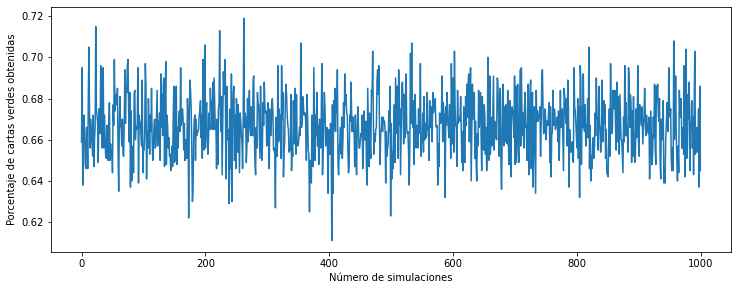

Probabilidad estimada promedio= 0.666798
Error valor obtenido vs valor esperado = 0.019700000000005824


In [531]:
from random import randint
import matplotlib.pyplot as plt
import numpy as np

def get_card(n):
    mazo = ["verde", "verde", "rojo"]
    carta_verde = 0
    for i in range(n):
        carta_verde += 1 if mazo[randint(0, 2)] == "verde" else 0
    
    return carta_verde
    
def start_simulation(n):
    positive_cases_percentage = []
    for i in range(n):
        positive_cases_percentage.append(get_card(n)/n)
    
    positive_cases_percentage = np.array(positive_cases_percentage)
    return positive_cases_percentage

def plot_simulation(n, cases):
    plt.figure(figsize=(12.2, 4.5))
    plt.plot(range(n), cases)
    plt.xlabel('Número de simulaciones')
    plt.ylabel('Porcentaje de cartas verdes obtenidas')
    plt.show()

total_simulations = 10
simulations = start_simulation(total_simulations)
plot_simulation(total_simulations, simulations)
print(f'Probabilidad estimada promedio = {np.mean(simulations)}')
print(f'Error valor obtenido vs valor esperado = {100 * (np.absolute((np.mean(simulations)-(2/3)))/(2/3))}')

total_simulations = 100
simulations = start_simulation(total_simulations)
plot_simulation(total_simulations, simulations)
print(f'Probabilidad estimada promedio = {np.mean(simulations)}')
print(f'Error valor obtenido vs valor esperado = {100 * (np.absolute((np.mean(simulations)-(2/3)))/(2/3))}')

total_simulations = 1000
simulations = start_simulation(total_simulations)
plot_simulation(total_simulations, simulations)
print(f'Probabilidad estimada promedio= {np.mean(simulations)}')
print(f'Error valor obtenido vs valor esperado = {100 * (np.absolute((np.mean(simulations)-(2/3)))/(2/3))}')

**c)** Después de programar la simulación de este problema, podemos observar que el valor obtenido en cada una de las simulaciones es bastante aproximado al valor de  $P(carta \ verde) = 2/3$ propuesto intuitivamente. Se puede observar que al aumentar el número de simulaciones, se obtiene un porcentaje cada vez más preciso. 

Formalmente, la manera en la que se obtuvo $P(carta \ verde) = 2/3$, fue mediante el siguiente arbol de decisiones: 

![title](arbol_de_decisiones.png)

Al sacar una carta de la bolsa y ponerla sobre la mesa, existen dos posibilidades:
* Obtener una cara roja
* Obtener una cara verde

Dada la condición de que la carta obtenida tiene una cara verde, podemos entonces eliminar las probabilidades asociadas a obtener una cara roja ya que no afectaran el resultado final. Por lo tanto, al eliminar las probabilidades asociadas a la carta roja por ambas caras, podemos decir que existen tres posibilidades:

1. Haber sacado la carta {verde, verde} y al voltearla, mostrar la otra cara verde.
2. Haber sacado la carta {verde, verde} y al voltearla, mostrar la otra cara verde.
3. Haber sacado la carta {rojo, verde} y al voltearla, mostrar la cara roja.

Tomando en cuenta lo anterior, podemos concluir que existe una probabilidad $P(carta \ verde) = 2/3$ de obtener una cara verde al voltear la carta.

Referencias 

- https://es.khanacademy.org/math/multivariable-calculus/applications-of-multivariable-derivatives/optimizing-multivariable-functions/a/what-is-gradient-descent#:~:text=El%20descenso%20de%20gradiente%20es%20un%20algoritmo%20que%20estima%20num%C3%A9ricamente,genera%20sus%20valores%20m%C3%A1s%20bajos.&text=En%20lugar%20de%20encontrar%20m%C3%ADnimos,aproxima%20la%20soluci%C3%B3n%20con%20n%C3%BAmeros.
- https://es.khanacademy.org/math/multivariable-calculus/multivariable-derivatives/partial-derivative-and-gradient-articles/a/the-gradient
- https://aga.frba.utn.edu.ar/diagonalizacion-de-una-matriz/
- https://aga.frba.utn.edu.ar/potencias-de-una-matriz-diagonalizable/